### Hyperparameters

In [1]:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
nb_filter = 10
filter_length = 1
nb_epoch = 10

### Load Data

In [2]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(index_from=0, nb_words=max_features)
word2idx = imdb.get_word_index()
idx2word = {idx: word for word, idx in word2idx.items()}

X_train.shape, X_test.shape

Using Theano backend.


((25000,), (25000,))

### Example

In [6]:
review_no = np.random.randint(X_train.shape[0])

' '.join(idx2word[idx] for idx in X_train[review_no] if idx > 1)

"i had intended to and and and of and and passing with numerous and films of his that i own on vhs however given my and light hearted christmas and i had to make do with just this one as it happens it features one of his best performances and he was and oscar nominated for it with film itself being likewise and this was also one of 14 and with that other most widely recognized star to and from italy and and both and are playing against type here she as an and and and he a homosexual br br by way film's title has a double meaning leading characters are brought together on and day in which hitler came to italy to meet and event itself being shown in lengthy and footage but it more specifically and to and and and in which they share moments of friendship revelation and briefly passion though each knows that a return to their normal existence is inevitable which leads to film's and and ending this is virtually a two and with all other characters save for and and of apartment block in which

### Sequence Lengths

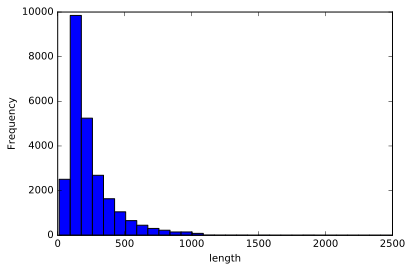

In [7]:
pd.Series(len(X) for X in X_train).plot(kind='hist', bins=30)

plt.xlabel('length')

### Pad Sequences to Same Length

In [8]:
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

X_train.shape, X_test.shape

((25000, 400), (25000, 400))

### Only Take First 1000 Examples

In [9]:
X_train, X_test = X_train[:1000], X_test[:1000]
y_train, y_test = y_train[:1000], y_test[:1000]

### Visualize Left Padding

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

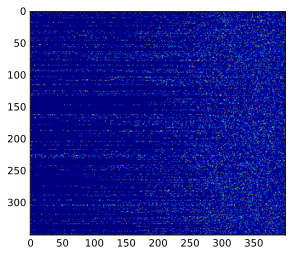

In [10]:
plt.imshow(X_train[:350])

X_train[0]

### Define Model

In [11]:
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import Convolution1D, MaxPooling1D
from keras.models import Model

input = Input(shape=[maxlen], dtype='int32')

embedded = Embedding(input_dim=max_features, output_dim=embedding_dims, input_length=maxlen, name='embedding')(input)
convolved = Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu', name='conv')(embedded)
pooled = MaxPooling1D(pool_length=maxlen-filter_length+1)(convolved)
flattened = Flatten()(pooled)

# We project onto a single unit output layer, and squash it with a sigmoid:
prob = Dense(output_dim=1, activation='sigmoid')(flattened)

model = Model(input=input, output=prob)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 400)           0                                            
____________________________________________________________________________________________________
embedding (Embedding)            (None, 400, 50)       250000      input_1[0][0]                    
____________________________________________________________________________________________________
conv (Convolution1D)             (None, 400, 10)       510         embedding[0][0]                  
____________________________________________________________________________________________________
maxpooling1d_1 (MaxPooling1D)    (None, 1, 10)         0           conv[0][0]                       
___________________________________________________________________________________________

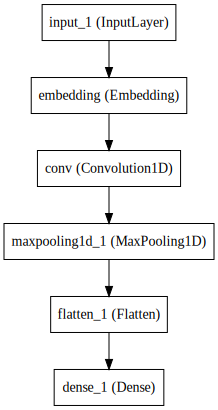

In [12]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Fit Model

In [13]:
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, validation_data=(X_test, y_test))

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s - loss: 0.6921 - acc: 0.5320 - val_loss: 0.6900 - val_acc: 0.6390
Epoch 2/10
1000/1000 [==============================] - 1s - loss: 0.6853 - acc: 0.7030 - val_loss: 0.6822 - val_acc: 0.6840
Epoch 3/10
1000/1000 [==============================] - 1s - loss: 0.6690 - acc: 0.7810 - val_loss: 0.6652 - val_acc: 0.6900
Epoch 4/10
1000/1000 [==============================] - 1s - loss: 0.6358 - acc: 0.8240 - val_loss: 0.6358 - val_acc: 0.7120
Epoch 5/10
1000/1000 [==============================] - 1s - loss: 0.5793 - acc: 0.8480 - val_loss: 0.5970 - val_acc: 0.7050
Epoch 6/10
1000/1000 [==============================] - 1s - loss: 0.5061 - acc: 0.8590 - val_loss: 0.5627 - val_acc: 0.6970
Epoch 7/10
1000/1000 [==============================] - 1s - loss: 0.4317 - acc: 0.8720 - val_loss: 0.5429 - val_acc: 0.7020
Epoch 8/10
1000/1000 [==============================] - 1s - loss: 0.3687 - a

### Get Filters

In [14]:
embeddings = model.get_layer('embedding').W.eval()

embeddings.shape

(5000, 50)

In [19]:
filters = model.get_layer('conv').W.eval()

filter_no = np.random.randint(filters.shape[0])
filter = filters[filter_no].flatten()

scores = np.dot(embeddings, filter[:, np.newaxis]).flatten()

top_idxs = list(reversed(np.argsort(scores))) # add one because that's where indexing starts

[idx2word[idx] for idx in top_idxs[:10]]

['poignant',
 'gem',
 'favorite',
 'generation',
 'living',
 'seasons',
 'brazil',
 'excellent',
 'gentle',
 'segment']